In [59]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

filename = ""
df = pd.read_excel(filename)
df.set_index('Pat', inplace=True)

annotations = [
    "0-2 years", 
    "3-14 years", 
    "15-39 years", 
    "40-64 years", 
    "65-74 years", 
    "75+ years"
]

annotations_labels = [
    "Patients: " + str(patients_infants), 
    "Patients: " + str(patients_children),
    "Patients: " + str(patients_AYA),
    "Patients: " + str(patients_regular_adults),
    "Patients: " + str(patients_seniors),
    "Patients: " + str(patients_elderly)
]

patients_infants = 0
patients_children = 0
patients_AYA = 0
patients_regular_adults = 0
patients_seniors = 0
patients_elderly = 0

In [61]:
for patient in df['AGEGRP']:
    if patient=="infants":
        patients_infants += 1
    elif patient=="children":
        patients_children +=1
    elif patient=="AYA":
        patients_AYA +=1
    elif patient=="adults":
        patients_regular_adults +=1
    elif patient=="seniors":
        patients_seniors +=1 
    elif patient=="elderly":
        patients_elderly +=1

In [62]:
#Molecular genetics
def get_mutation_group(row):
    epigenetic_mutations = ["ASXL1", "BCOR", "BCORL1", "DNMT3A", "EZH2", "IDH1", "IDH2", "TET2"]
    cytogenetics_mutations = ["inv16_t16.16", "t8.21", "minus.5", "del.5q.", "minus.7", "minus.17", "del.7q."]
    cohesion_mutations = ["RAD21", "SMC1A", "SMC3", "STAG2"]
    splicing_mutations = ["SF3B1", "SRSF2", "U2AF1", "ZRSR2"]
    signaling_mutations = ["CBL", "CSF3R", "FLT3I", "FLT3T", "JAK2", "KIT", "KRAS", "NOTCH1", "NRAS", "PTPN11"]
    transcription_mutations = ["CEBPA", "CEBPADM", "CEBPA.bZIP", "CEBPA.bZIP.inframe", "CUX1", "GATA2", "IKZF1", "PHF6", "RUNX1", "WT1"]
    npm1_mutations = ["NPM1"]
    tp53_mutations = ["TP53"]
    
    
    mutation_groups = []

    if any(row[mutation] == 1 for mutation in epigenetic_mutations):
        mutation_groups.append("Epigenetic")
    if any(row[mutation] == 1 for mutation in cytogenetics_mutations):
        mutation_groups.append("Cytogenetics")
    if any(row[mutation] == 1 for mutation in cohesion_mutations):
        mutation_groups.append("Cohesin")
    if any(row[mutation] == 1 for mutation in splicing_mutations):
        mutation_groups.append("Splicing")
    if any(row[mutation] == 1 for mutation in signaling_mutations):
        mutation_groups.append("Signaling")
    if any(row[mutation] == 1 for mutation in transcription_mutations):
        mutation_groups.append("Transcription")
    if any(row[mutation] == 1 for mutation in npm1_mutations):
        mutation_groups.append("NPM1")
    if any(row[mutation] == 1 for mutation in tp53_mutations):
        mutation_groups.append("TP53")

    return "/".join(mutation_groups)

# Apply the function to create the "Mutation group" column
df["Mutation group"] = df.apply(get_mutation_group, axis=1)

In [ ]:
#Cytogenetics
def get_mutation_group(row):
    fav_mutations = ["inv16_t16.16", "t8.21"] 
    adv_mutations = ["t.6.9..p23.q34.", "inv.3..q21.q26.2.","minus.5","del.5q.",
                     "t.9.22..q34.q11.","minus.7", "minus.17",'t.v.11..v.q23.',"abn.17p."]
    int_mutations = ["t.9.11..p21.23.q23.", "CGNK"]

    mutation_groups = []

    if any(row[mutation] == 1 for mutation in fav_mutations):
        mutation_groups.append("Favorable")
    if any(row[mutation] == 1 for mutation in adv_mutations):
        mutation_groups.append("Adverse")
    if any(row[mutation] == 1 for mutation in int_mutations):
        mutation_groups.append("Intermediate")

    return "/".join(mutation_groups)

# Apply the function to create the "Mutation group" column
df["Mutation group"] = df.apply(get_mutation_group, axis=1)

          Signaling  Transcription  Epigenetic  Cohesin  NPM1  Splicing  TP53
AGEGRP                                                                       
AYA             382            202         174       41   121        31    15
adults          667            383         709      149   418       149    82
children        286            120          65       31    29         6     6
elderly          82             83         149       33    54        71    25
infants          78             12          11        6     0         2     1
seniors         242            163         357       55   131       137    64


/var/folders/qd/9sg0d6sx64n3y25mg5hdfd180000gn/T/ipykernel_5697/4082429555.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_cmap = plt.cm.get_cmap('viridis')


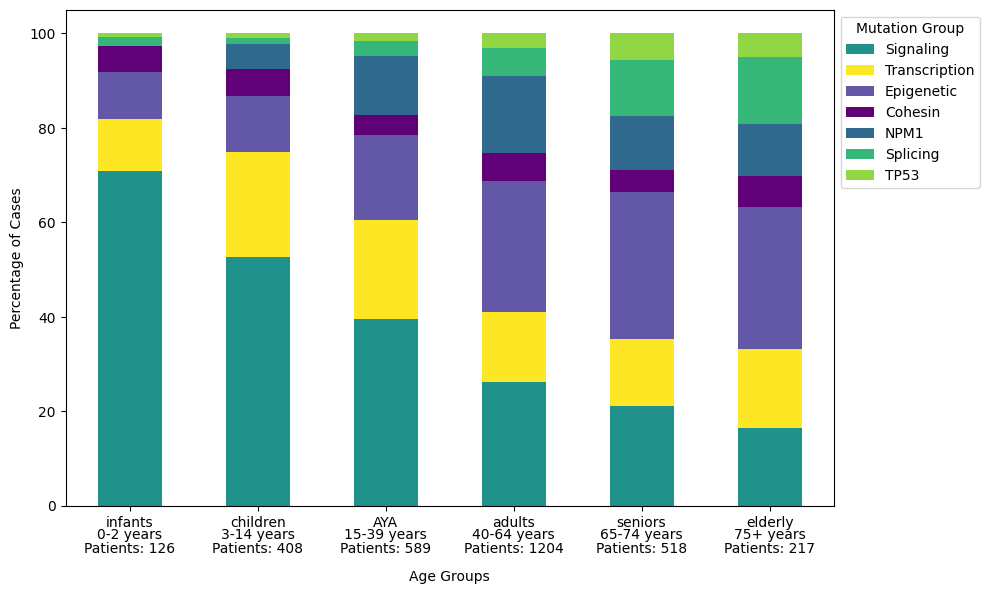

In [63]:
#Molecular genetics
mutation_groups = ["Signaling", "Transcription", "Epigenetic","Cohesin",  "NPM1", "Splicing", "TP53" ]

# Initialize columns for each mutation group
for group in mutation_groups:
    df[group] = 0

# Update counts for each mutation group
for group in mutation_groups:
    df[group] = df.apply(lambda row: row["Mutation group"].count(group) if pd.notnull(row["Mutation group"]) else 0, axis=1)

# Group by age group and sum the counts for each mutation group
grouped_df = df.groupby("AGEGRP")[mutation_groups].sum()
# Normalize each row to get percentages
grouped_df_percentage = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Define custom color map
colors = ['#21918C', '#FDE725', '#6358A7', '#610178', '#31688E', '#35B779', '#90D743']
custom_cmap = ListedColormap(colors)

# Reorder the index of grouped_df_percentage
new_order = ["infants", "children", "AYA", "adults", "seniors", "elderly"]
grouped_df_percentage = grouped_df_percentage.reindex(new_order)

# Plot stacked bar chart with custom color map
ax = grouped_df_percentage.plot(kind="bar", stacked=True, colormap=custom_cmap, figsize=(10, 6))

# Add labels and title
ax.set_xlabel("Age Groups")
ax.set_ylabel("Percentage of Cases")
ax.xaxis.set_label_coords(0.5, -0.13)
# Display the legend
ax.legend(title="Mutation Group", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)

for i, label in enumerate(annotations):
    ax.text(i, -7, label, rotation=0, ha='center')

for i, label in enumerate(annotations_labels):
    ax.text(i, -10, label, rotation=0, ha='center')

plt.tight_layout()

plt.savefig('', facecolor='w', dpi=300, format="tiff")

# Show the plot
plt.show()

          Adverse  Intermediate  Favorable
AGEGRP                                    
AYA            60           228        144
adults        141           653        114
children       67           119        147
elderly        31            99          6
infants        34            27         19
seniors        89           226         17


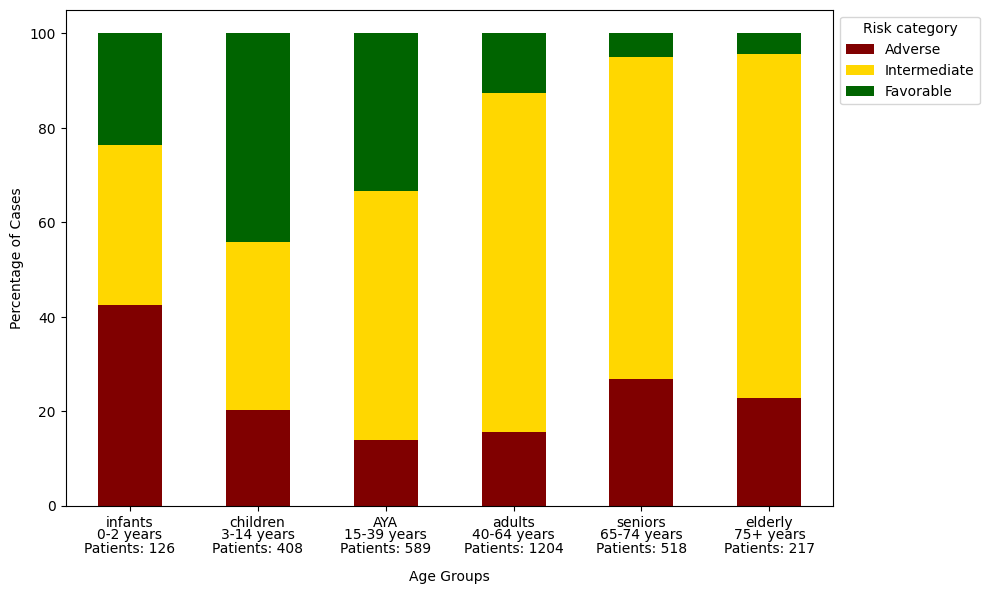

In [75]:
#Cytogenetics
mutation_groups = ["Adverse",  "Intermediate", "Favorable"]

# Initialize columns for each mutation group
for group in mutation_groups:
    df[group] = 0

# Update counts for each mutation group
for group in mutation_groups:
    df[group] = df.apply(lambda row: row["Mutation group"].count(group) if pd.notnull(row["Mutation group"]) else 0, axis=1)

# Group by age group and sum the counts for each mutation group
grouped_df = df.groupby("AGEGRP")[mutation_groups].sum()
# Normalize each row to get percentages
grouped_df_percentage = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

colors = {
    "Adverse": "maroon",
    "Intermediate": "gold",
    "Favorable": "darkgreen"
}

# Reorder the index of grouped_df_percentage
new_order = ["infants", "children", "AYA", "adults", "seniors", "elderly"]
grouped_df_percentage = grouped_df_percentage.reindex(new_order)

# Plot stacked bar chart with custom color map
ax = grouped_df_percentage.plot(kind="bar", stacked=True, color=colors.values(), figsize=(10, 6))

# Add labels and title
ax.set_xlabel("Age Groups")
ax.set_ylabel("Percentage of Cases")
ax.xaxis.set_label_coords(0.5, -0.13)
# Display the legend
ax.legend(title="Risk category", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)

for i, label in enumerate(annotations):
    ax.text(i, -7, label, rotation=0, ha='center')
    
annotations = [
    "Patients: " + str(patients_infants), 
    "Patients: " + str(patients_children),
    "Patients: " + str(patients_AYA),
    "Patients: " + str(patients_regular_adults),
    "Patients: " + str(patients_seniors),
    "Patients: " + str(patients_elderly)
]

for i, label in enumerate(annotations_labels):
    ax.text(i, -10, label, rotation=0, ha='center')

plt.tight_layout()

plt.savefig('', facecolor='w', dpi=300, format="tiff")

# Show the plot
plt.show()